# Lineare Algebra
## Vektoren und Matrizen

## Vektoren

In [1]:
v1 = [1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

In [2]:
v2 = [4, 5, 6]

3-element Array{Int64,1}:
 4
 5
 6

## Skalarprodukt

In [37]:
#v1 * v2 # gives error

In [7]:
v1'*v2 # identical
transpose(v1) * v2

1-element Array{Int64,1}:
 32

In [15]:
dot(v1, v2) # identical
⋅(v1, v2)

32

In [18]:
# KREUHOHOYZIGT IHN!
cross(v1, v2) # identical
×(v1, v2)

3-element Array{Int64,1}:
 -3
  6
 -3

## Matrizen

In [22]:
M = rand(3, 3)

3x3 Array{Float64,2}:
 0.265032  0.914543  0.602157
 0.782998  0.96617   0.277694
 0.531733  0.69517   0.256418

In [30]:
N = rand(3, 3)

3x3 Array{Float64,2}:
 0.533556  0.765223  0.261157
 0.284992  0.141627  0.175627
 0.129486  0.328065  0.582865

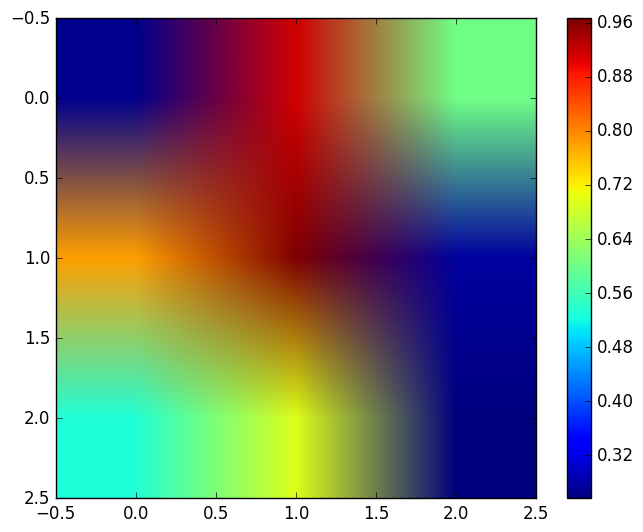

In [28]:
using PyPlot
imshow(M)
colorbar();

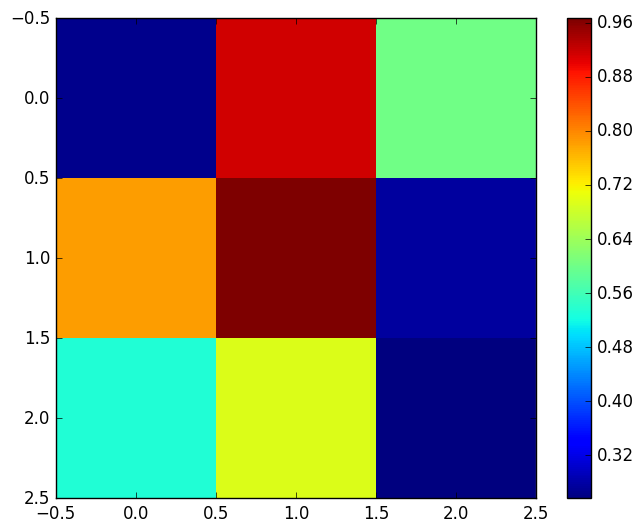

In [29]:
using PyPlot
imshow(M, interpolation="none")
colorbar();

### Matrix-Multiplikation

In [31]:
M*N # identical
*(M, N)

3x3 Array{Float64,2}:
 0.480017  0.529879  0.580809
 0.729081  0.827105  0.536029
 0.51503   0.589471  0.410413

In [34]:
M*v1

3-element Array{Float64,1}:
 3.90059
 3.54842
 2.69133

In [36]:
v1'*N

1x3 Array{Float64,2}:
 1.492  2.03267  2.36101

# 1. Lineare Gleichungssysteme (LGS)

Betrachte das LGS:

\begin{align}
    x - 2y + 2z &= 5\\
    x -  y + 2z &= 7\\
    -x +y+z     &= 5
\end{align}

In [39]:
A = [1 -2 2 ; 1 -1 2 ; -1 1 1]

3x3 Array{Int64,2}:
  1  -2  2
  1  -1  2
 -1   1  1

In [40]:
b = [5, 7, 5]

3-element Array{Int64,1}:
 5
 7
 5

Löse die Gleichung $A\cdot\vec{v} = \vec{b}$:

In [41]:
v = A\b

3-element Array{Float64,1}:
 1.0
 2.0
 4.0

## Determinante und Inverse

In [42]:
det(A)

3.0

In [44]:
inv(A)

3x3 Array{Float64,2}:
 -1.0  1.33333   -0.666667
 -1.0  1.0       -0.0     
  0.0  0.333333   0.333333

In [46]:
A*inv(A)

3x3 Array{Float64,2}:
 1.0   1.11022e-16  0.0
 0.0   1.0          0.0
 0.0  -1.66533e-16  1.0

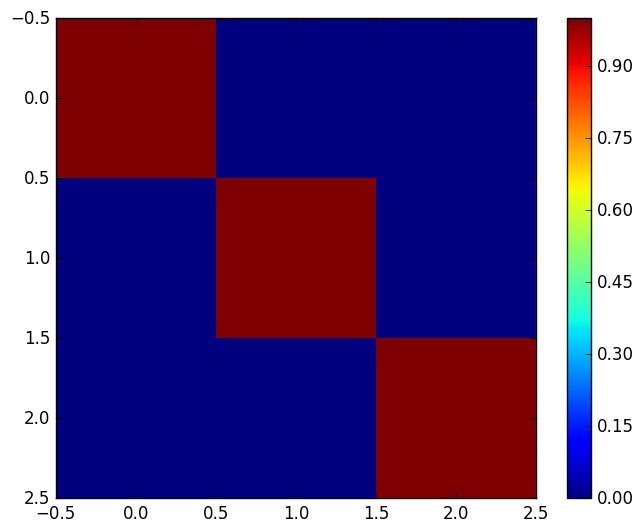

In [49]:
imshow(A*inv(A), interpolation="none")
colorbar();

In [50]:
rank(A)

3

In [51]:
trace(A)

1

Betrachte ein unterdeterminiertes LGS:

\begin{align}
    x - 2y + 2z &= 5\\
    x -  y + 2z &= 7\\
\end{align}

In [56]:
A = [1 -2 2 ; 1 -1 2]

2x3 Array{Int64,2}:
 1  -2  2
 1  -1  2

In [61]:
det(A) # produces error: matrix is not square

0.0

In [62]:
inv(A)

LoadError: LoadError: Base.LinAlg.SingularException(3)
while loading In[62], in expression starting on line 1

In [63]:
A = [1 -2 2 ; 1 -1 2 ; 1 -2 2]
b[3] = 0

0

In [59]:
det(A)

0.0

In [60]:
inv(A)

LoadError: LoadError: Base.LinAlg.SingularException(3)
while loading In[60], in expression starting on line 1

In [64]:
rank(A)

2

Betrachte ein überdeterminiertes LGS:

\begin{align}
    -x - 2y &= 5\\
    -x + 2y &= 7\\
    x +y &=  5
\end{align}

In [66]:
A = [-2 2; -1 2; 1 1]

3x2 Array{Int64,2}:
 -2  2
 -1  2
  1  1

In [67]:
b = [5, 7, 5]

3-element Array{Int64,1}:
 5
 7
 5

In [69]:
A\b # ergibt eine Loesung, aber es gibt beliebig viele!!!

2-element Array{Float64,1}:
 1.27586
 3.93103

## Eigenwerte und -vektoren

In [71]:
A = [1 -2 2 ; 1 -1 2 ; -1 1 1]

3x3 Array{Int64,2}:
  1  -2  2
  1  -1  2
 -1   1  1

In [73]:
λ = eigvals(A) # eigenvalues

3-element Array{Complex{Float64},1}:
 -0.287372+1.35im
 -0.287372-1.35im
   1.57474+0.0im 

In [77]:
v = eigvecs(A)

3x3 Array{Complex{Float64},2}:
   0.783249+0.0im         0.783249-0.0im       0.237883+0.0im
   0.493483-0.303862im    0.493483+0.303862im  0.651777+0.0im
 -0.0106833+0.22483im   -0.0106833-0.22483im   0.720138+0.0im

In [78]:
v1 = v[:, 1]
v2 = v[:, 2]
v3 = v[:, 3]

3-element Array{Complex{Float64},1}:
 0.237883+0.0im
 0.651777+0.0im
 0.720138+0.0im

In [83]:
A*v1

3-element Array{Complex{Float64},1}:
 -0.225084+1.05738im  
    0.2684+0.753522im 
 -0.300449-0.0790321im

In [84]:
λ[1]*v1

3-element Array{Complex{Float64},1}:
 -0.225084+1.05738im  
    0.2684+0.753522im 
 -0.300449-0.0790321im

In [87]:
A*v1-λ[1]*v1 # ungefähr Null, Fehler von 10^-16

3-element Array{Complex{Float64},1}:
 -2.22045e-16+2.22045e-16im 
           1.11022e-16+0.0im
  2.77556e-16-1.38778e-16im 

In [91]:
diag(A) # Diagonale von A

3-element Array{Int64,1}:
  1
 -1
  1

In [95]:
Diagonal(λ)

3x3 Diagonal{Complex{Float64}}:
 -0.287372+1.35im        0.0+0.0im       0.0+0.0im
       0.0+0.0im   -0.287372-1.35im      0.0+0.0im
       0.0+0.0im         0.0+0.0im   1.57474+0.0im

## Matrix-Zerlegungen
Singulärwert-Zerlegung / singular value decomposition (SVD)


$A = USV^\dagger$

In [96]:
A

3x3 Array{Int64,2}:
  1  -2  2
  1  -1  2
 -1   1  1

In [99]:
U, S, V = svd(A);

In [100]:
U

3x3 Array{Float64,2}:
 -0.777773   -0.0889336  -0.622222
 -0.625027    0.214034    0.750687
  0.0664157   0.972769   -0.222056

In [101]:
S

3-element Array{Float64,1}:
 3.83545 
 1.75824 
 0.444862

In [102]:
V

3x3 Array{Float64,2}:
 -0.383062  -0.482111  0.787929 
  0.585847   0.532692  0.610756 
 -0.714175   0.695564  0.0783893

In [103]:
svdvals(A)

3-element Array{Float64,1}:
 3.83545 
 1.75824 
 0.444862

Eine spezielle Matrix: Bilder (z. B. von Einstein in s/w; dann sind die Werte zwischen 0 und 1)